In [1]:
import delivery_area
import db

In [2]:
db.clear_areas()
db.clear_couriers()

# Test add areas

In [3]:
myAreas = [
           [
            [0, 0],
            [0, 5],
            [5, 3],
            [7, 6],
            [6, 2]
           ],
           [
            [0, 0],
            [6, 2],
            [6, 0]
           ],
           [
            [0, 5],
            [0, 9],
            [7, 6],
            [5, 5]
           ],
           [
            [0, 5],
            [5, 5],
            [7, 6],
            [5, 3]
           ],
           [
            [0, 9],
            [0, 10],
            [10, 10],
            [9, 0],
            [7, 6]
           ],
           [
            [9, 0],
            [10, 10],
            [10, 0]
           ],
           [
            [6, 0],
            [6, 2],
            [7, 6],
            [9, 0]
           ]
]

areas = delivery_area.get_all_areas()
print(f'Now database have {len(areas)} areas')
delivery_area.add_areas(myAreas)
areas = delivery_area.get_all_areas()
print(f'After adding, database have {len(areas)} areas:')
for id_area, points in areas:
    print(f'id={id_area:<3} points:  x   y')
    for x, y in points:
        print(f'{x:>17} {y:>3}')
    print()

Now database have 0 areas
After adding, database have 7 areas:
id=1   points:  x   y
                0   0
                0   5
                5   3
                7   6
                6   2

id=2   points:  x   y
                0   0
                6   2
                6   0

id=3   points:  x   y
                0   5
                0   9
                7   6
                5   5

id=4   points:  x   y
                0   5
                5   5
                7   6
                5   3

id=5   points:  x   y
                0   9
                0  10
               10  10
                9   0
                7   6

id=6   points:  x   y
                9   0
               10  10
               10   0

id=7   points:  x   y
                6   0
                6   2
                7   6
                9   0



# Test add couriers

In [4]:
couriers = db.get_all_couriers()
print(f'Now database have {len(couriers)} couriers')

for i in range(1, len(areas) + 1):
    delivery_area.assign_courier_to_area(f'Courier assigned to zone {i}', i)

couriers = db.get_all_couriers()
print(f'After adding, database have {len(couriers)} couriers:')
for id_courier, id_area, info in couriers:
    print(f'\tid={id_courier}, area={id_area}, description={info}')

Now database have 0 couriers
After adding, database have 7 couriers:
	id=1, area=1, description=Courier assigned to zone 1
	id=2, area=2, description=Courier assigned to zone 2
	id=3, area=3, description=Courier assigned to zone 3
	id=4, area=4, description=Courier assigned to zone 4
	id=5, area=5, description=Courier assigned to zone 5
	id=6, area=6, description=Courier assigned to zone 6
	id=7, area=7, description=Courier assigned to zone 7


# Test assgin order to courier

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon

(3, 'Courier assigned to zone 3')


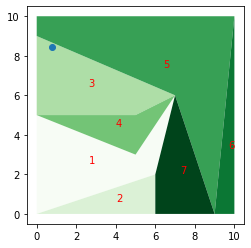

(7, 'Courier assigned to zone 7')


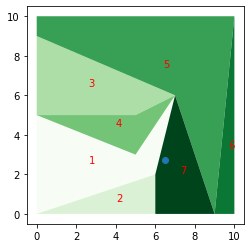

(5, 'Courier assigned to zone 5')


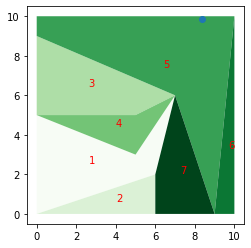

(7, 'Courier assigned to zone 7')


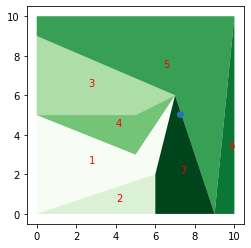

(2, 'Courier assigned to zone 2')


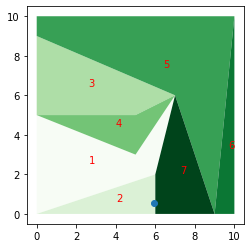

(3, 'Courier assigned to zone 3')


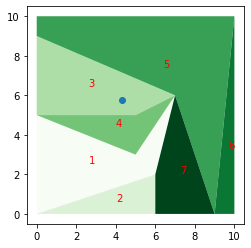

(1, 'Courier assigned to zone 1')


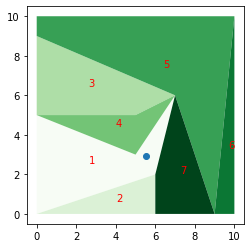

(5, 'Courier assigned to zone 5')


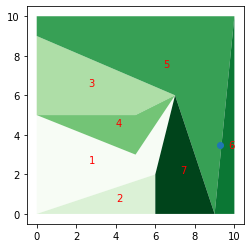

(5, 'Courier assigned to zone 5')


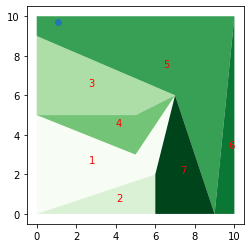

(5, 'Courier assigned to zone 5')


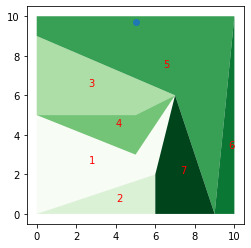

In [6]:
boundary = gpd.GeoSeries([Polygon(area[1]) for area in areas])

for _ in range(10):
    ax = boundary.plot(cmap="Greens")

    for i, geo in boundary.centroid.iteritems():
        ax.annotate(s=i+1, xy=[geo.x, geo.y], color="red")
    
    point = np.random.rand(2)*10
    plt.plot(*point, 'o')
    print(delivery_area.assign_courier_for_delivery(point))
    plt.show()